# ECSE415 - Intro to Computer Vision
## Assignment 1 - Image Filtering
### Alexander Harris - 260688155

# 2. Edge detection
## 2.1 Sobel edge detector

## 1 - Effect of sharpening on edge detection

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Import original image in grayscale
img_gray = cv2.imread('data/rice.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('data/rice.png')

# Sobel filter applied to rice.png
img_edges_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
img_edges_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
img_edges = cv2.magnitude(img_edges_x, img_edges_y)

# Apply threshold to resulting image
_, img_thresh150 = cv2.threshold(img_edges, 150, 150, cv2.THRESH_TOZERO)
_, img_thresh200 = cv2.threshold(img_edges, 200, 200, cv2.THRESH_TOZERO)

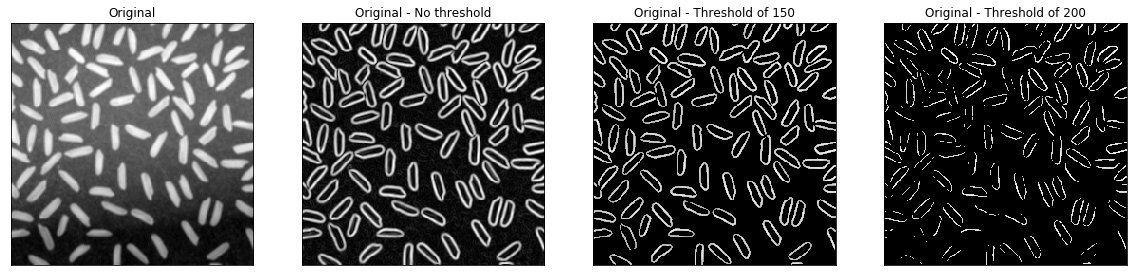

In [8]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(img_edges, cmap="gray")
plt.title('Original - No threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(img_thresh150, cmap="gray")
plt.title('Original - Threshold of 150'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(img_thresh200, cmap="gray")
plt.title('Original - Threshold of 200'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# Compute sharpened images
box_img = cv2.boxFilter(img, -1, (5,5))
gaussian_img = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

box_details = cv2.subtract(img, box_img)
sharp_box_img = cv2.cvtColor(cv2.add(img, box_details), cv2.COLOR_BGR2GRAY)

gaussian_details = cv2.subtract(img, gaussian_img)
sharp_gaussian_img = cv2.cvtColor(cv2.add(img, gaussian_details), cv2.COLOR_BGR2GRAY)

In [10]:
# Apply Sobel filter to box-sharpened image
box_edges_x = cv2.Sobel(sharp_box_img, cv2.CV_32F, 1, 0, ksize=3)
box_edges_y = cv2.Sobel(sharp_box_img, cv2.CV_32F, 0, 1, ksize=3)
box_edges = cv2.magnitude(box_edges_x, box_edges_y)

# Apply threshold
_, box_thresh150 = cv2.threshold(box_edges, 150, 150, cv2.THRESH_TOZERO)
_, box_thresh200 = cv2.threshold(box_edges, 200, 200, cv2.THRESH_TOZERO)

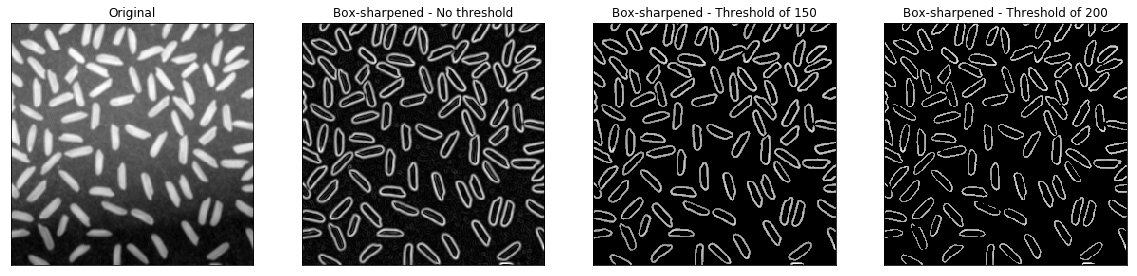

In [11]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(box_edges, cmap="gray")
plt.title('Box-sharpened - No threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(box_thresh150, cmap="gray")
plt.title('Box-sharpened - Threshold of 150'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(box_thresh200, cmap="gray")
plt.title('Box-sharpened - Threshold of 200'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# Apply Sobel filter to Gaussian-sharpened image
gaussian_edges_x = cv2.Sobel(sharp_gaussian_img, cv2.CV_32F, 1, 0, ksize=3)
gaussian_edges_y = cv2.Sobel(sharp_gaussian_img, cv2.CV_32F, 0, 1, ksize=3)
gaussian_edges = cv2.magnitude(gaussian_edges_x, gaussian_edges_y)

# Apply threshold
_, gaussian_thresh150 = cv2.threshold(gaussian_edges, 150, 150, cv2.THRESH_TOZERO)
_, gaussian_thresh200 = cv2.threshold(gaussian_edges, 200, 200, cv2.THRESH_TOZERO)

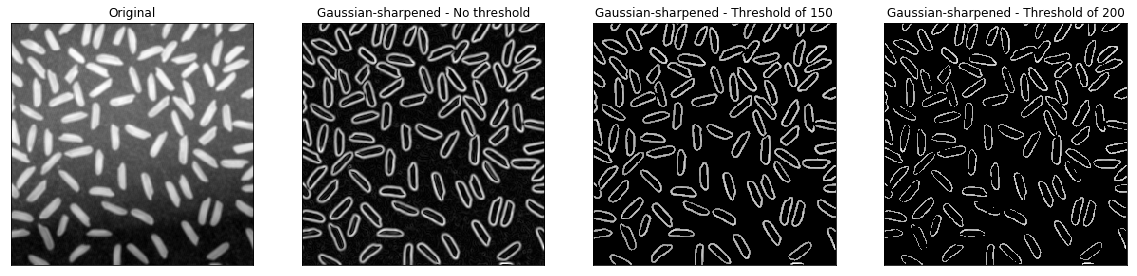

In [13]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(gaussian_edges, cmap="gray")
plt.title('Gaussian-sharpened - No threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(gaussian_thresh150, cmap="gray")
plt.title('Gaussian-sharpened - Threshold of 150'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(gaussian_thresh200, cmap="gray")
plt.title('Gaussian-sharpened - Threshold of 200'), plt.xticks([]), plt.yticks([])
plt.show()

We can observer that sharpening the images prior was able to improve the edge detection by a significant amount, especially when using 200 as the threshold, we can see that the images originating from both the box and Gaussian sharpened images have much more defined edges.

## 2 - Effect of denoising on edge detection

In [16]:
img_woman = cv2.imread('data/woman.png', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter to woman image
woman_edges_x = cv2.Sobel(img_woman, cv2.CV_32F, 1, 0, ksize=3)
woman_edges_y = cv2.Sobel(img_woman, cv2.CV_32F, 0, 1, ksize=3)
woman_edges = cv2.magnitude(woman_edges_x, woman_edges_y)

# Compute threshold value
# resp = cv2.max(img_woman, woman_edges)

#TODO: Finished threshold

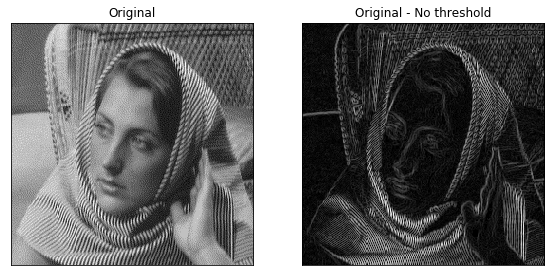

In [15]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman, cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(woman_edges, cmap="gray")
plt.title('Original - No threshold'), plt.xticks([]), plt.yticks([])

plt.show()